<a href="https://colab.research.google.com/github/OH1107/statistics/blob/master/training/4%EC%9E%A5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%B0%8F_%EA%B8%B0%EC%B4%88%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 분석을 위한 데이터 준비

In [4]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [1]:
from google.colab import drive

ROOT = "/content/drive"  
drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/statistics/data

/content/drive/My Drive/Colab Notebooks/statistics/data


In [3]:
%ls

'실습파일_10장 분산분석.ipynb'
'실습파일_11장 회귀분석.ipynb'
'실습파일_12장 요인분석.ipynb'
'실습파일_13장 분류예측분석.ipynb'
'실습파일_14장 군집분석.ipynb'
'실습파일_15장 포지셔닝 분석.ipynb'
'실습파일_16장 컨조인트 분석.ipynb'
'실습파일_17장 비모수 통계분석.ipynb'
'실습파일_3장 파이썬 기초.ipynb'
'실습파일_4장 데이터전처리 및 기초분석.ipynb'
'실습파일_5장 기술통계분석.ipynb'
'실습파일_6장 t 검정.ipynb'
'실습파일_7장 상관관계분석.ipynb'
'실습파일_8장 범주형 데이터 분석.ipynb'
'실습파일_9장 신뢰성 분석.ipynb'
 Ashopping.csv
 CCA.csv
 Conjoint.csv
 Correspondence.csv
 부록_통계표.docx
 MDS1.csv
 MDS3.csv
'Step by Step 파이썬 비즈니스 통계분석_정오표.xlsx'


## 데이터 전처리 및 파생변수 생성

- 표본 추출하기

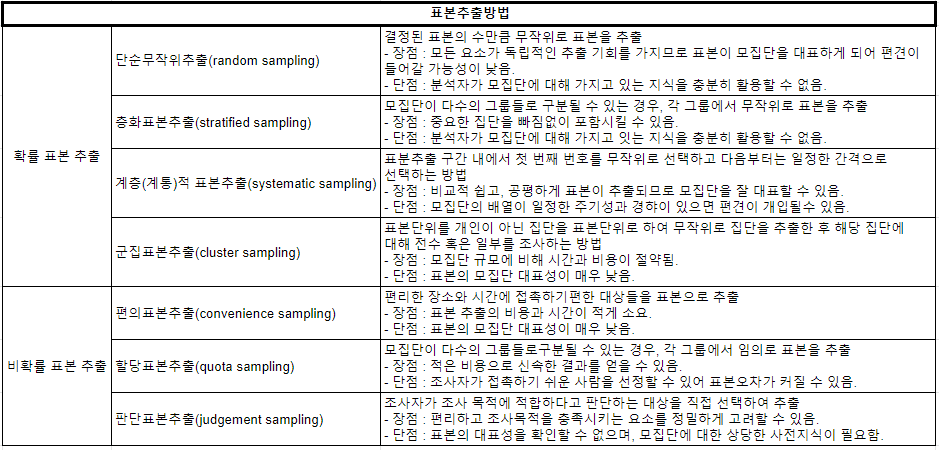

### 데이터 호출하기

In [4]:
import pandas as pd
df = pd.read_csv('Ashopping.csv',sep=',',encoding='cp949')
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,6,6,1,3,1051,1,6,6,7,2,4,4,2,2,6,6,5,6.0,6.0,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,6,6,0,6,1038,0,3,4,7,5,6,5,5,7,6,6,7,6.0,6.0,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,4,4,0,2,1092,1,4,5,7,3,2,3,5,5,7,6,7,6.0,NaN,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,5,5,1,6,1069,0,5,6,7,3,6,4,6,5,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4


### 표본 추출
- 10개의 행만 무작위 표본추출을 해보고자 한다.

In [5]:
data_temp=df.sample(n=10, replace=False, random_state=123)
data_temp

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
131,132,0,5501240,27,203750,22,350050,1,4,1,5,5,1,3,1052,0,3,6,7,4,5,5,3,4,6,7,6,6.0,6.0,6,7,6,7,6,5,6,6,6,5
203,204,0,24832930,78,318371,6,186545,1,2,0,7,7,1,4,1085,0,7,7,7,6,7,7,6,7,6,5,5,5.0,6.0,5,6,5,5,5,5,5,5,5,5
50,51,0,3225460,8,403183,19,365795,1,1,0,5,5,0,3,946,1,6,6,6,2,3,4,6,3,6,5,5,5.0,6.0,5,6,5,5,5,5,5,5,5,5
585,586,0,14802080,30,493403,13,324795,1,2,1,7,7,1,7,1083,0,3,7,7,5,7,7,6,7,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
138,139,0,8546080,45,189913,12,302750,1,2,1,5,5,1,5,1090,0,6,6,7,5,6,7,6,6,7,6,5,6.0,6.0,5,7,6,7,6,5,5,6,6,6
632,633,0,21913110,18,1217395,12,303695,1,3,1,7,7,1,9,1089,0,5,5,7,3,7,6,5,6,6,5,6,6.0,6.0,6,5,6,6,7,5,6,6,5,5
328,329,0,4990750,19,262671,13,322850,1,4,1,5,5,1,9,938,0,7,7,6,3,4,5,7,7,5,5,6,7.0,6.0,6,6,5,5,5,7,6,5,5,6
461,462,0,6831040,34,200913,21,19300,1,2,0,5,5,1,1,1051,0,4,5,7,5,5,6,6,5,5,6,6,5.0,5.0,5,6,5,5,5,4,6,6,5,5
924,925,0,4224300,10,422430,20,347200,2,4,1,2,2,1,3,679,0,5,5,6,3,4,5,5,6,7,5,6,7.0,6.0,7,6,5,6,7,6,7,6,5,6
479,480,0,2812370,18,156243,11,296895,1,4,0,5,5,1,5,927,0,3,4,5,3,2,5,4,5,5,4,5,4.0,5.0,7,7,6,7,6,5,4,5,5,5


### 조건을 만족하는 레코드 추출
- 고객의 이탈여부가 '1', 즉 이탈로 판단된 고객만을 추출해보고자 한다.

In [6]:
churn_customer=df[df.이탈여부==1]
churn_customer.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
18,19,1,8421390,9,935710,16,365845,1,3,1,6,6,1,5,615,0,2,6,2,2,6,4,4,4,5,6,6,6.0,NaN,6,5,5,6,7,6,6,5,6,6
63,64,1,2301730,10,230173,17,365395,1,4,0,6,6,1,8,693,0,5,6,2,3,1,4,5,6,6,5,7,NaN,NaN,6,7,6,7,6,6,6,6,7,6
71,72,1,6636750,7,948107,28,377345,2,3,1,4,4,1,3,528,0,5,6,1,2,5,4,5,6,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4
72,73,1,9773200,7,1396171,23,379595,2,3,0,3,3,1,3,549,0,4,7,2,2,6,3,4,6,5,7,6,6.0,7.0,6,7,6,6,7,5,7,6,6,6


### 특정 필드 추출
- '고객ID', '방문빈도' 컬럼만을 추출하는 필드 추출을 진행해보고자 한다.

In [7]:
df_1=df[['고객ID','방문빈도']]
df_1.head()

,고객ID,방문빈도
0,1,17
1,2,14
2,3,18
3,4,17
4,5,73


### 데이터 분할
- '고객ID'를 기준으로 고객 ID가 500이하와 500초과의 두 고객 군으로 분할하고자 한다.

In [8]:
Under_500 = df[df.고객ID<=500]
Upper_500 = df[df.고객ID>500]
Under_500.tail()
Upper_500.tail()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
995,996,0,5135090,8,641886,3,44445,1,3,1,6,6,1,3,1051,1,6,6,7,2,4,4,2,2,6,6,5,6.0,6.0,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,6,6,0,6,1038,0,3,4,7,5,6,5,5,7,6,6,7,6.0,6.0,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,4,4,0,2,1092,1,4,5,7,3,2,3,5,5,7,6,7,6.0,NaN,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,5,5,1,6,1069,0,5,6,7,3,6,4,6,5,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4
999,1000,0,3182880,23,138386,19,367045,1,4,0,5,5,1,8,1072,0,4,5,7,4,3,5,4,6,6,5,6,7.0,7.0,7,7,6,7,6,5,6,7,6,6


### 데이터 추가
- 앞서 분할한 데이터를 다시 추가한다.

In [9]:
df_join=Under_500.append(Upper_500, ignore_index=True)
df_join

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,6,6,1,3,1051,1,6,6,7,2,4,4,2,2,6,6,5,6.0,6.0,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,6,6,0,6,1038,0,3,4,7,5,6,5,5,7,6,6,7,6.0,6.0,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,4,4,0,2,1092,1,4,5,7,3,2,3,5,5,7,6,7,6.0,NaN,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,5,5,1,6,1069,0,5,6,7,3,6,4,6,5,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4


### 데이터 병합
- '고객ID' 컬럼을 공통으로 가진 데이터 세트 2개를 병합하고자 한다.

In [10]:
df_1=df[['고객ID','방문빈도']]
df_2=df[['고객ID','총_매출액']]

df_merge=df_1.merge(df_2)

df_merge.head()

,고객ID,방문빈도,총_매출액
0,1,17,4007080
1,2,14,3168400
2,3,18,2680780
3,4,17,5946600
4,5,73,13745950


## 파생변수 생성

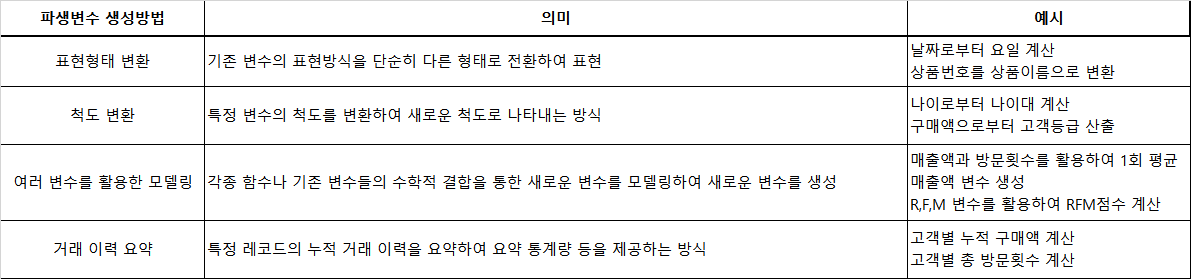

### 표현형태 변환
- 성별 데이터에 대한 표현형태를 변환하고자 한다.

In [11]:
import numpy as np

df['남녀']=np.where(df.성별 == 0, '남자','여자')
df[['고객ID','성별','남녀']]

,고객ID,성별,남녀
0,1,1,여자
1,2,1,여자
2,3,1,여자
3,4,1,여자
4,5,0,남자
...,...,...,...
995,996,1,여자
996,997,0,남자
997,998,0,남자
998,999,1,여자


### 척도 변환
- 고객들의 총 매출액을 기준으로 5,000,000원 이상일 경우 **상**, 3,000,000원 이상일 경우 **중**, 3,000,000원 미만일 경우 **하**로 표현하는 고객등급 변수를 만들어보고자 한다.

In [12]:
df['New고객등급']=np.where(df.총_매출액>=5000000, '상', np.where(df.총_매출액>=3000000, '중', '하'))
df[['고객ID','총_매출액','New고객등급']]

,고객ID,총_매출액,New고객등급
0,1,4007080,중
1,2,3168400,중
2,3,2680780,하
3,4,5946600,상
4,5,13745950,상
...,...,...,...
995,996,5135090,상
996,997,10315690,상
997,998,2741290,하
998,999,11268990,상


### 모델링 기반 파생변수 생성
- 고객들의 1회 평균매출액이라는 파생변수를 만들어 보고자한다.

In [13]:
df['New_1회_평균매출액']=df['총_매출액']/df['방문빈도']
df[['고객ID','총_매출액','방문빈도','New_1회_평균매출액']]

,고객ID,총_매출액,방문빈도,New_1회_평균매출액
0,1,4007080,17,235710.588235
1,2,3168400,14,226314.285714
2,3,2680780,18,148932.222222
3,4,5946600,17,349800.000000
4,5,13745950,73,188300.684932
...,...,...,...,...
995,996,5135090,8,641886.250000
996,997,10315690,49,210524.285714
997,998,2741290,10,274129.000000
998,999,11268990,15,751266.000000


### 거래이력 요약을 통한 파생변수 생성
- 이탈여부에 따라 이탈여부 그룹별 매출액 합계를 생성해보고자 한다.

In [14]:
churn_customer = df[df.이탈여부==1]
Non_churn_customer = df[df.이탈여부==0]

print(sum(churn_customer.총_매출액))
print(sum(Non_churn_customer.총_매출액))

373918850
6694770910


## 유용한 통계 그래프

### 히스토그램
- 기업은 매년 고객들의 서비스 만족도를 조사하여 개선해야할 문제점을 찾아 해결해나가고 있다.
- 이를 위해 고객 서비스 만족도의 현황을 히스토그램으로 파악하고자 한다.

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

mpl.rcParams['axes.unicode_minus'] = False

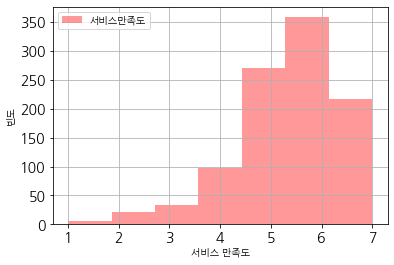

In [16]:
%matplotlib inline
plt.hist(df['서비스_만족도'], alpha=0.4, bins=7, rwidth=1, color='red', label='서비스만족도')

plt.legend()
plt.grid()
plt.xlabel('서비스 만족도')
plt.ylabel('빈도')
plt.xticks(fontsize=14) #글씨 크기설정
plt.yticks(fontsize=14) #글씨 크기설정
plt.show()

### 산점도
- 만약 방문빈도가 높은 고객들이 대체적으로 총 매출액에 높게 나타난다면 고객들의 방문을 유도해야 할 것이다.
- 고객들의 방문 횟수와 총 매출액의 관계를 알아보고자 한다.

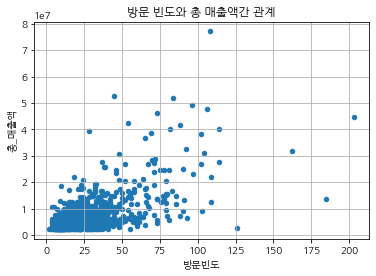

In [17]:
df.plot.scatter(x='방문빈도', y='총_매출액', grid=True, title='방문 빈도와 총 매출액간 관계')

### 파이차트
- 파이차트를 활용하여 구매유형 별 고객들의 분포를 확인해보고자 한다.

In [18]:
groupby_구매유형 = df.groupby('구매유형')
groupby_구매유형.describe()

고객ID                          ...   New_1회_평균매출액                             
      count        mean         std  ...            50%            75%           max
구매유형                                 ...                                            
1      43.0  523.186047  286.875886  ...  364625.000000  414084.375000  4.897520e+05
2     317.0  476.406940  282.585411  ...  193453.666667  268758.923077  4.966717e+05
3     144.0  514.868056  287.815069  ...  630736.878669  786918.432540  2.680100e+06
4     496.0  509.760081  293.080306  ...  248438.571429  344615.297203  4.994987e+05

[4 rows x 312 columns]

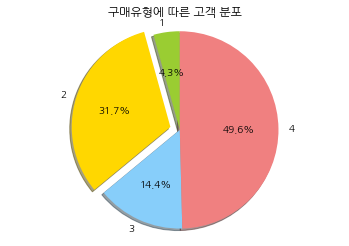

In [19]:
labels = ['1','2','3','4'] # 라벨 지정
sizes=[43,317,144,496] # 크기 지정
colors=['yellowgreen','gold','lightskyblue','lightcoral'] # 색 지정
explode=(0,0.1,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('구매유형에 따른 고객 분포')
plt.show()